In [12]:
import matplotlib.pyplot as plt
import skimage
from skimage.io import imread
from skimage.measure import regionprops
import numpy as np
import math
from os.path import join
import pandas as pd
import os

In [4]:
%load_ext autoreload
%autoreload 2

# Load utility functions from detect_clusters.py
import detect_clusters

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load image and compute region properties

In [5]:
from os.path import join
datadir = '../'

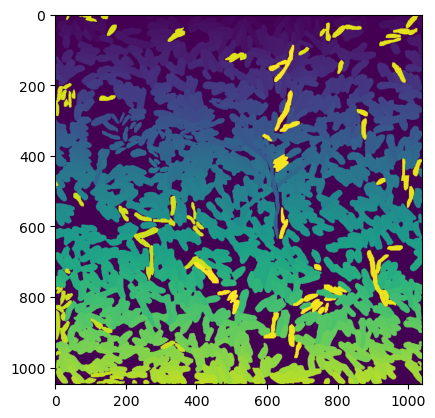

In [6]:
#%matplotlib ipympl
%matplotlib inline
L = imread(join(datadir,'bacteriamasks/wbeads0000_cp_masks.png'))

plt.imshow(L)

In [6]:
P = regionprops(L)

labels = np.array([p.label for p in P])
C = np.array([p.centroid for p in P])
a = np.array([p.orientation for p in P])
area = np.array([p.area for p in P])
labels, C, a, area

(array([   1,    2,    3, ..., 1158, 1159, 1160], shape=(1160,)),
 array([[  8.80045872,  19.37844037],
        [ 15.46621622,  46.68243243],
        [ 16.68805704, 218.90552585],
        ...,
        [827.70190641, 511.3102253 ],
        [742.47830803, 443.07483731],
        [714.06549118, 407.95465995]], shape=(1160, 2)),
 array([-1.25915446, -0.64852672, -0.03352382, ..., -0.26614386,
         0.7873471 ,  0.90212916], shape=(1160,)),
 array([436., 444., 561., ..., 577., 922., 397.], shape=(1160,)))

## Display util functions

In [9]:
from detect_clusters import xylim, plot_cell_axis
from detect_clusters import labels2rgb

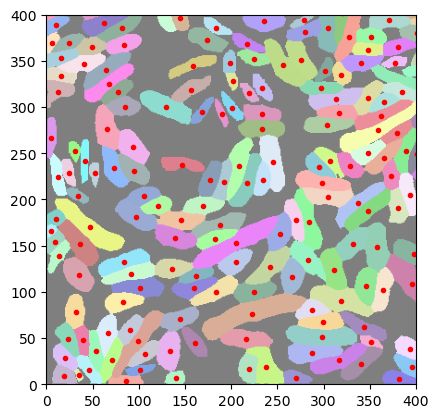

In [10]:
rg = (0,400, 0,400)

plt.imshow(labels2rgb(L)*0.5+0.5)
plt.plot(C[:,1],C[:,0],'r.')
xylim(rg)

In [10]:
label2orientation = np.zeros( labels.max()+1, dtype=np.float32 )
label2orientation[labels] = a

A = label2orientation[L]

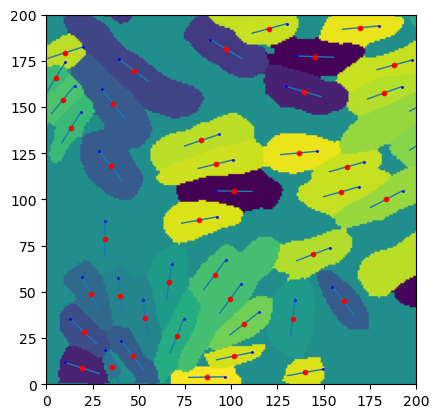

In [11]:
plt.imshow(A)
plot_cell_axis(L, rd=10)
xylim(r)

# Process multiple files

In [203]:
ns=[0,1,2,3,5,6,7,8,9]
filenames = [join(datadir,f'bacteriamasks/wbeads000{n}_cp_masks.png') for n in ns]
Ls = [imread(f) for f in filenames]

In [100]:
from skimage.io import imsave

clustering = DBSCAN(eps=20, min_samples=3)

for kk in range(len(filenames)):
  n = ns[kk]
  f = filenames[kk]
  L = Ls[kk]
  outname = f'bacteriamasks/cluster_wbeads000{n}_cp_clusters.png'
  rgbname = f'bacteriamasks/rgb_wbeads000{n}_cp_rgbclusters.png'
  
  print(f,outname,rgbname)
  
  P = regionprops(L)
  
  labels = np.array([p.label for p in P],dtype=np.uint16)
  C = np.array([p.centroid for p in P])

  c = clustering.fit_predict(C)

  label2cluster = np.zeros( labels.max()+1, dtype=np.int16 )
  label2cluster[labels] = c

  CL = label2cluster[L]
  imsave(outname, CL)
  RGB = labels2rgb(CL)
  imsave(rgbname, np.uint8(RGB*255.0))
  

bacteriamasks/wbeads0000_cp_masks.png bacteriamasks/cluster_wbeads0000_cp_clusters.png bacteriamasks/rgb_wbeads0000_cp_rgbclusters.png


/tmp/ipykernel_14626/2124419331.py:25: UserWarning: bacteriamasks/cluster_wbeads0000_cp_clusters.png is a low contrast image
  imsave(outname, CL)


bacteriamasks/wbeads0001_cp_masks.png bacteriamasks/cluster_wbeads0001_cp_clusters.png bacteriamasks/rgb_wbeads0001_cp_rgbclusters.png


/tmp/ipykernel_14626/2124419331.py:25: UserWarning: bacteriamasks/cluster_wbeads0001_cp_clusters.png is a low contrast image
  imsave(outname, CL)


bacteriamasks/wbeads0002_cp_masks.png bacteriamasks/cluster_wbeads0002_cp_clusters.png bacteriamasks/rgb_wbeads0002_cp_rgbclusters.png


/tmp/ipykernel_14626/2124419331.py:25: UserWarning: bacteriamasks/cluster_wbeads0002_cp_clusters.png is a low contrast image
  imsave(outname, CL)


bacteriamasks/wbeads0003_cp_masks.png bacteriamasks/cluster_wbeads0003_cp_clusters.png bacteriamasks/rgb_wbeads0003_cp_rgbclusters.png


/tmp/ipykernel_14626/2124419331.py:25: UserWarning: bacteriamasks/cluster_wbeads0003_cp_clusters.png is a low contrast image
  imsave(outname, CL)


bacteriamasks/wbeads0005_cp_masks.png bacteriamasks/cluster_wbeads0005_cp_clusters.png bacteriamasks/rgb_wbeads0005_cp_rgbclusters.png


/tmp/ipykernel_14626/2124419331.py:25: UserWarning: bacteriamasks/cluster_wbeads0005_cp_clusters.png is a low contrast image
  imsave(outname, CL)


bacteriamasks/wbeads0006_cp_masks.png bacteriamasks/cluster_wbeads0006_cp_clusters.png bacteriamasks/rgb_wbeads0006_cp_rgbclusters.png


/tmp/ipykernel_14626/2124419331.py:25: UserWarning: bacteriamasks/cluster_wbeads0006_cp_clusters.png is a low contrast image
  imsave(outname, CL)


bacteriamasks/wbeads0007_cp_masks.png bacteriamasks/cluster_wbeads0007_cp_clusters.png bacteriamasks/rgb_wbeads0007_cp_rgbclusters.png


/tmp/ipykernel_14626/2124419331.py:25: UserWarning: bacteriamasks/cluster_wbeads0007_cp_clusters.png is a low contrast image
  imsave(outname, CL)


bacteriamasks/wbeads0008_cp_masks.png bacteriamasks/cluster_wbeads0008_cp_clusters.png bacteriamasks/rgb_wbeads0008_cp_rgbclusters.png


/tmp/ipykernel_14626/2124419331.py:25: UserWarning: bacteriamasks/cluster_wbeads0008_cp_clusters.png is a low contrast image
  imsave(outname, CL)


bacteriamasks/wbeads0009_cp_masks.png bacteriamasks/cluster_wbeads0009_cp_clusters.png bacteriamasks/rgb_wbeads0009_cp_rgbclusters.png


/tmp/ipykernel_14626/2124419331.py:25: UserWarning: bacteriamasks/cluster_wbeads0009_cp_clusters.png is a low contrast image
  imsave(outname, CL)


# RAG graph approach

In [19]:
from detect_clusters import generate_graph
from detect_clusters import show_rag2, xylim
from detect_clusters import labels2rgb

from detect_clusters import to_pandas_nodelist
from networkx import to_pandas_edgelist

In [9]:
rag = generate_graph(L)

In [10]:
print(rag.nodes)
to_pandas_nodelist(rag)

[0, np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31), np.int32(32), np.int32(33), np.int32(34), np.int32(35), np.int32(36), np.int32(37), np.int32(38), np.int32(39), np.int32(40), np.int32(41), np.int32(42), np.int32(43), np.int32(44), np.int32(45), np.int32(46), np.int32(47), np.int32(48), np.int32(49), np.int32(50), np.int32(51), np.int32(52), np.int32(53), np.int32(54), np.int32(55), np.int32(56), np.int32(57), np.int32(58), np.int32(59), np.int32(60), np.int32(61), np.int32(62), np.int32(63), np.int32(64), np.int32(65), np.int32(66), np.int32(67), np.int32(68), np.int32(69), np.int32(70), np.int32(71), np.int32(72

labels   area     angle                                  centroid  \
0        [0]    0.0  0.000000                            [500.0, 500.0]   
1        [1]  436.0 -1.259154    [8.80045871559633, 19.378440366972477]   
2        [2]  444.0 -0.648527  [15.466216216216216, 46.682432432432435]   
3        [3]  561.0 -0.033524  [16.688057040998217, 218.90552584670232]   
4        [4]  965.0 -0.499418  [18.492227979274613, 238.25699481865286]   
...      ...    ...       ...                                       ...   
420    [420]  738.0  1.099504   [419.78726287262873, 522.0108401084011]   
429    [429]  349.0 -0.511133    [422.0114613180516, 423.1518624641834]   
825    [825]  512.0 -0.988023                [831.46875, 390.310546875]   
900    [900]  689.0 -0.391789    [915.8621190130624, 765.2510885341075]   
1022  [1022]  353.0 -1.102249    [1018.9405099150142, 661.872521246459]   

      boundary_count  
0             132068  
1                172  
2                228  
3                211  
4                305  
...              ...  
420              360  
429              213  
825              258  
900              288  
1022             204  

[1161 rows x 5 columns]

In [11]:
print(rag.edges)
to_pandas_edgelist(rag)

[(0, np.int32(1)), (0, np.int32(2)), (0, np.int32(3)), (0, np.int32(4)), (0, np.int32(5)), (0, np.int32(6)), (0, np.int32(7)), (0, np.int32(8)), (0, np.int32(9)), (0, np.int32(10)), (0, np.int32(11)), (0, np.int32(12)), (0, np.int32(13)), (0, np.int32(14)), (0, np.int32(15)), (0, np.int32(16)), (0, np.int32(17)), (0, np.int32(18)), (0, np.int32(19)), (0, np.int32(20)), (0, np.int32(21)), (0, np.int32(22)), (0, np.int32(23)), (0, np.int32(24)), (0, np.int32(25)), (0, np.int32(26)), (0, np.int32(27)), (0, np.int32(28)), (0, np.int32(29)), (0, np.int32(30)), (0, np.int32(31)), (0, np.int32(32)), (0, np.int32(33)), (0, np.int32(34)), (0, np.int32(35)), (0, np.int32(36)), (0, np.int32(37)), (0, np.int32(38)), (0, np.int32(39)), (0, np.int32(40)), (0, np.int32(41)), (0, np.int32(42)), (0, np.int32(43)), (0, np.int32(44)), (0, np.int32(45)), (0, np.int32(46)), (0, np.int32(47)), (0, np.int32(48)), (0, np.int32(49)), (0, np.int32(50)), (0, np.int32(51)), (0, np.int32(52)), (0, np.int32(53)), (

source  target  weight  count  relative_angle  centroid_distance  \
0          0       1     1.0    114       90.000000        1000.000000   
1          0       2     1.0     86       90.000000        1000.000000   
2          0       3     1.0    116       90.000000        1000.000000   
3          0       4     1.0    128       90.000000        1000.000000   
4          0       5     1.0    145       90.000000        1000.000000   
...      ...     ...     ...    ...             ...                ...   
3145    1155    1157     1.0     57        0.382759          11.597987   
3146    1157    1158     1.0     22       28.227246          22.093868   
3147    1159    1160     1.0     24        6.576527          45.174274   
3148     401     418     1.0     25       62.613374          26.267862   
3149     418     429     1.0     84        1.795694          12.252800   

      max_count_ratio  
0            0.662791  
1            0.377193  
2            0.549763  
3            0.419672  
4            0.747423  
...               ...  
3145         0.301587  
3146         0.116402  
3147         0.097561  
3148         0.118483  
3149         0.394366  

[3150 rows x 7 columns]

In [26]:
r = [200,500, 200,500] # Display XY range

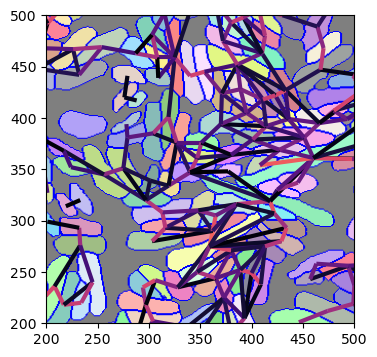

In [27]:
Lrgb = labels2rgb(L)

# Plot label image with adjency graph. Edge color based on count of shared border pixels between adjencent regions
fig,ax = plt.subplots(1,1,figsize=(4,4))
show_rag2(L, rag, Lrgb*0.5+0.5, ax=ax, img_cmap=None, border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, ignore_node=0)
xylim(r)

In [25]:
# Factory to create filtering functions with fixed parameters
from detect_clusters import EdgeFilterAll, EdgeFilterNone, EdgeFilterAngle, EdgeFilterAngleCentroid

def EdgeFilterAngleCount(amax=15, count_min=20):
  return lambda rag,u,v: (rag.get_edge_data(u,v)['relative_angle']<=amax) and (rag.get_edge_data(u,v)['count']>=count_min)

def EdgeFilterAngleRatio(amax=15, count_ratio_min=0.2):
  return lambda rag,u,v: (rag.get_edge_data(u,v)['relative_angle']<=amax) and (rag.get_edge_data(u,v)['max_count_ratio']>=count_ratio_min)

# Many filters can be defined
edge_filter = EdgeFilterAll()
edge_filter = EdgeFilterNone()
edge_filter = EdgeFilterAngle(15)
edge_filter = EdgeFilterAngleCentroid(amax=15, dmax=20)
edge_filter = EdgeFilterAngleCount(15, count_min=20)
edge_filter = EdgeFilterAngleRatio(15, count_ratio_min=0.2)


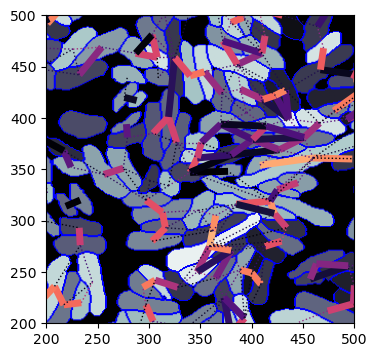

In [29]:
Lrgb = labels2rgb(L)

edge_filter = EdgeFilterAngle(amax=15)

fig,ax = plt.subplots(1,1,figsize=(4,4))
show_rag2(L, rag, Lrgb, ax=ax, border_color='blue', dataname='max_count_ratio', edge_width=5, edge_cmap='magma', hide_zero=True, edge_filter=edge_filter, show_filtered=True, ignore_node=0)
xylim(r)

In [30]:
from detect_clusters import compute_clusters
from detect_clusters import rag_attribute_image

# perform clustering with selected edge filter
edge_filter = EdgeFilterAngleRatio(amax=15, count_ratio_min=0.2)
compute_clusters(rag, min_cluster_size=2, edge_filter=edge_filter);

In [14]:
to_pandas_nodelist(rag)

labels   area     angle                                  centroid  \
0        [0]    0.0  0.000000                            [500.0, 500.0]   
1        [1]  436.0 -1.259154    [8.80045871559633, 19.378440366972477]   
2        [2]  444.0 -0.648527  [15.466216216216216, 46.682432432432435]   
3        [3]  561.0 -0.033524  [16.688057040998217, 218.90552584670232]   
4        [4]  965.0 -0.499418  [18.492227979274613, 238.25699481865286]   
...      ...    ...       ...                                       ...   
420    [420]  738.0  1.099504   [419.78726287262873, 522.0108401084011]   
429    [429]  349.0 -0.511133    [422.0114613180516, 423.1518624641834]   
825    [825]  512.0 -0.988023                [831.46875, 390.310546875]   
900    [900]  689.0 -0.391789    [915.8621190130624, 765.2510885341075]   
1022  [1022]  353.0 -1.102249    [1018.9405099150142, 661.872521246459]   

      boundary_count  cluster  
0             132068        0  
1                172       -1  
2                228       -1  
3                211       -1  
4                305       -1  
...              ...      ...  
420              360       93  
429              213       96  
825              258       -1  
900              288      194  
1022             204      230  

[1161 rows x 6 columns]

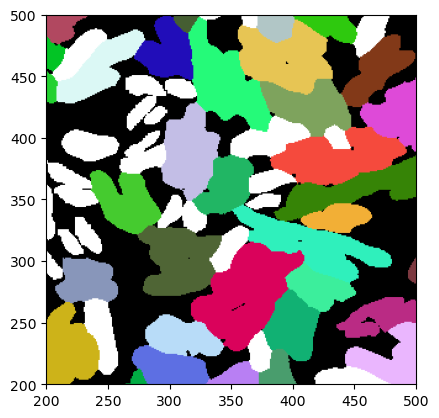

In [31]:
K = rag_attribute_image(L, rag, 'cluster').astype(int)
Krgb = labels2rgb(K)
plt.imshow(Krgb)
xylim(r)
plt.show()

In [35]:
numpy.random.rand ( np.max(K).astype(int)+1,3 )

array([[0.64057445, 0.83558899, 0.27104459],
       [0.94653074, 0.83738344, 0.84166458],
       [0.38097072, 0.14195798, 0.61858946],
       [0.4319498 , 0.55772892, 0.85988615],
       [0.37702554, 0.40464229, 0.72348309],
       [0.72980428, 0.92428227, 0.1616038 ],
       [0.87145917, 0.25715698, 0.66462234],
       [0.56402928, 0.24250886, 0.31938259],
       [0.64621832, 0.05312563, 0.73200048],
       [0.22753963, 0.44035855, 0.75630696],
       [0.06155537, 0.91797354, 0.0789896 ],
       [0.0103612 , 0.01724328, 0.75866313],
       [0.89028489, 0.08071705, 0.14339622],
       [0.80440531, 0.67118662, 0.95141768],
       [0.54259384, 0.89487831, 0.07423101],
       [0.52303657, 0.0817546 , 0.35205024],
       [0.50042993, 0.84371561, 0.54587391],
       [0.53618687, 0.14274098, 0.00528973],
       [0.42833593, 0.12974076, 0.55522355],
       [0.36384893, 0.7450985 , 0.34142764],
       [0.73094854, 0.43946908, 0.86359869],
       [0.3925949 , 0.69191653, 0.7157223 ],
       [0.

In [42]:
K

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 227., 227., 227.],
       [  0.,   0.,   0., ..., 227., 227., 227.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], shape=(1048, 1040))

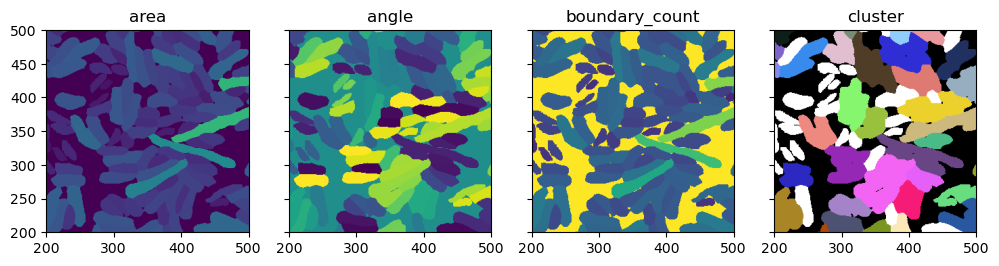

In [47]:
from matplotlib.colors import ListedColormap

attrs = ['area','angle','boundary_count','cluster']
n=len(attrs)
fig, axes = plt.subplots(1,n, figsize=(n*3,3), sharex='all', sharey='all')

for i,attr in enumerate(attrs):
  plt.sca(axes[i])
  K = rag_attribute_image(L, rag, attr)
  if (attr=='cluster'): 
    colors = numpy.random.rand ( round(np.max(K))+1,3 )
    colors[0,:] = 1.0 # no cluster
    K[K==0] = np.nan # Background
    K[K==-1] = 0 # no cluster
    cmap = ListedColormap ( colors )
    cmap.set_bad('black')
    plt.imshow(K, cmap=cmap)
  else:
    plt.imshow(K)
  plt.title(attr)
  if (attr=='boundary_count'): plt.clim(0,1000)
  xylim(r)

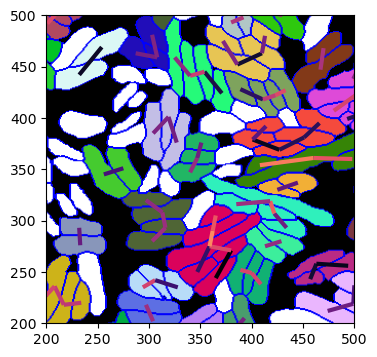

In [50]:
#Lrgb = labels2rgb(L)
K = rag_attribute_image(L, rag, 'cluster').astype(int)
Krgb = labels2rgb(K)

#edge_filter defined previously

fig,ax = plt.subplots(1,1,figsize=(4,4))
show_rag2(L, rag, Krgb, img_cmap=None, ax=ax, border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=edge_filter, show_filtered=False, ignore_node=0)
xylim(r)

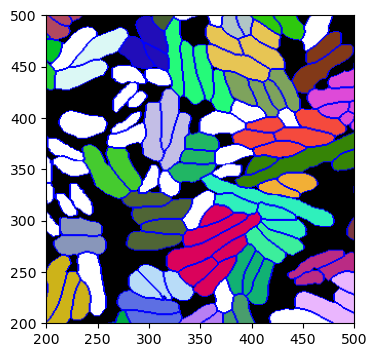

In [49]:
K = rag_attribute_image(L, rag, 'cluster').astype(int)
Krgb = labels2rgb(K)

fig,ax = plt.subplots(1,1,figsize=(4,4))
show_rag2(L, rag, Krgb, img_cmap=None, ax=ax, border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r)

# Process pair of images

In [52]:
# define image stack
ns=[0,1,2,3,5,6,7,8,9]
filenames = [join(datadir,f'bacteriamasks/wbeads000{n}_cp_masks.png') for n in ns]
filenames

['../bacteriamasks/wbeads0000_cp_masks.png',
 '../bacteriamasks/wbeads0001_cp_masks.png',
 '../bacteriamasks/wbeads0002_cp_masks.png',
 '../bacteriamasks/wbeads0003_cp_masks.png',
 '../bacteriamasks/wbeads0005_cp_masks.png',
 '../bacteriamasks/wbeads0006_cp_masks.png',
 '../bacteriamasks/wbeads0007_cp_masks.png',
 '../bacteriamasks/wbeads0008_cp_masks.png',
 '../bacteriamasks/wbeads0009_cp_masks.png']

In [292]:
to_pandas_nodelist(rag1)

labels   area     angle                                 centroid  \
0        [0]    0.0  0.000000                           [500.0, 500.0]   
1        [1]  333.0 -0.602797  [11.702702702702704, 50.08108108108108]   
2        [2]  570.0  1.170017   [12.049122807017543, 97.6140350877193]   
3        [3]  325.0  1.480174  [5.006153846153846, 198.60615384615386]   
4        [4]  640.0 -0.053539                 [21.990625, 219.3984375]   
...      ...    ...       ...                                      ...   
1179  [1179]  366.0  0.874501     [707.844262295082, 403.448087431694]   
544    [544]  333.0  0.196143  [496.85885885885887, 673.0960960960961]   
650    [650]  340.0 -0.420526   [590.0529411764705, 521.3205882352942]   
799    [799]  495.0  0.138870   [741.030303030303, 264.65858585858587]   
1012  [1012]  231.0 -0.738745  [918.2597402597403, 455.85714285714283]   

      boundary_count    id  cluster  trackid  clustertrack  
0             132961     0        0        0             0  
1                182     1        1        1             1  
2                271     2       -1        2            -1  
3                144     3       -1        3            -1  
4                230     4        2        4             2  
...              ...   ...      ...      ...           ...  
1179             225  1179      178     1179           178  
544              179   544      126      544           126  
650              179   650      158      650           158  
799              224   799      174      799           174  
1012             144  1012      236     1012           236  

[1180 rows x 9 columns]

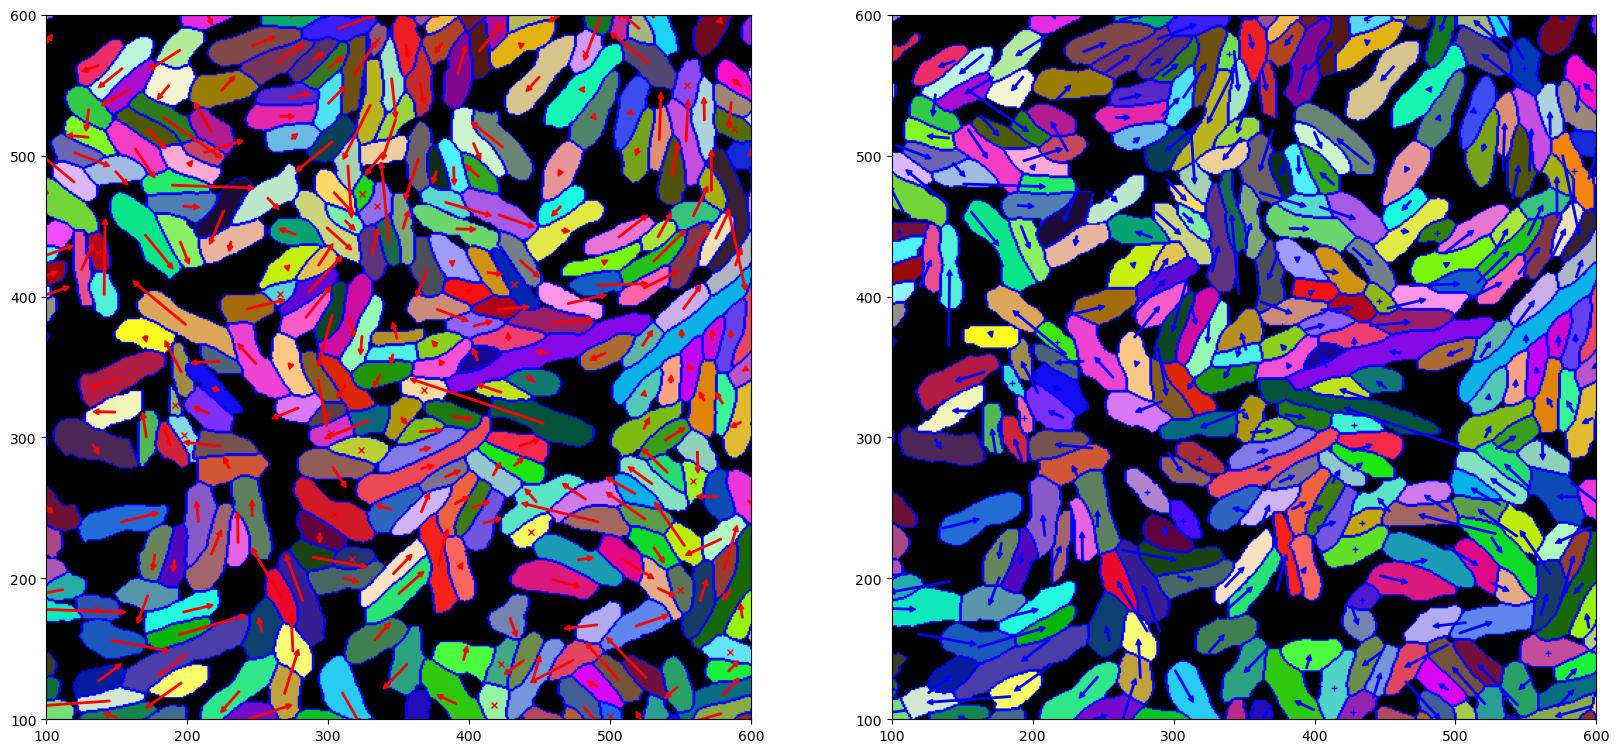

In [351]:
K1 = rag_attribute_image(L1, rag1, 'trackid').astype(int)
K2 = rag_attribute_image(L2, rag2, 'trackid').astype(int)

Krgb1 = labels2rgb(K1)
Krgb2 = labels2rgb(K2)

s=10
vs = 3

fig,ax = plt.subplots(1,2,figsize=(2*s,s))
show_rag2(L1, rag1, Krgb1, img_cmap=None, ax=ax[0], border_color='blue', velocity_front=True, velocity_scale=vs, edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[0])
show_rag2(L2, rag2, Krgb2, img_cmap=None, ax=ax[1], border_color='blue', velocity_back=True, velocity_scale=vs, edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[1])

Cell match: matched = 1090, new = 94, map2to1[0] = 0
Cluster match: matched = 193, new = 45


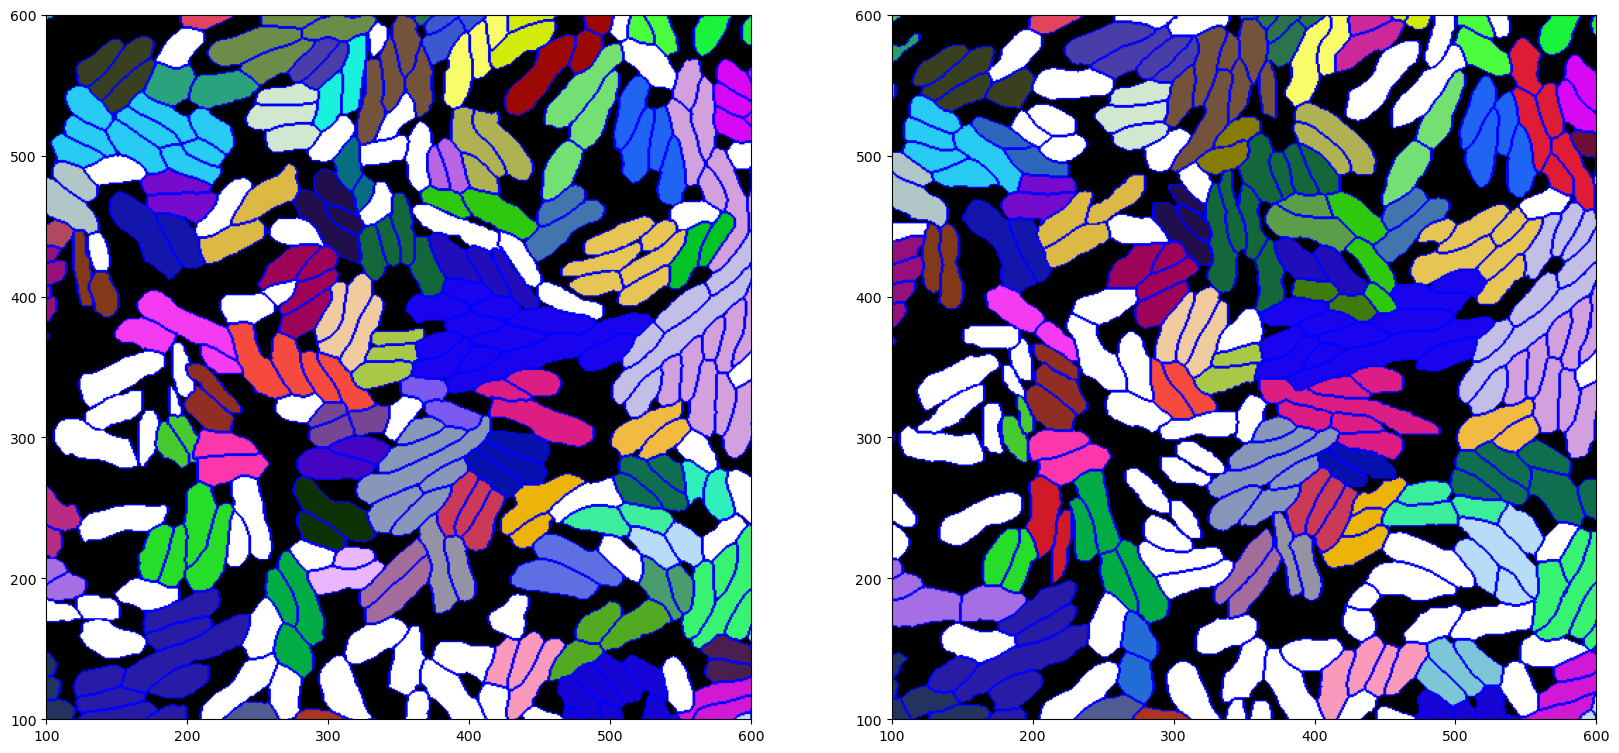

In [357]:
from detect_clusters import EdgeFilterAngleCountVelocity

L1 = imread(filenames[1])
L2 = imread(filenames[2])

#edge_filter = EdgeFilterAngleRatio(amax=15, count_ratio_min=0.15)
edge_filter = EdgeFilterAngleCountVelocity(amax=15, count_min=20, vdiffmax=40)

computeVelocities(rag1, rag2)
computeRelativeVelocities(rag1, source='velocity_front')
computeRelativeVelocities(rag2, source='velocity_back')

rag1 = detectAndTrackClusters(L1, None, None, edge_filter = edge_filter,
                              cluster_metric='count',
                              cluster_thresh=1)
rag2 = detectAndTrackClusters(L2, rag1, L1, edge_filter = edge_filter,
                              cluster_metric='count',
                              cluster_thresh=1)

K1 = rag_attribute_image(L1, rag1, 'clustertrack').astype(int)
K2 = rag_attribute_image(L2, rag2, 'clustertrack').astype(int)

Krgb1 = labels2rgb(K1)
Krgb2 = labels2rgb(K2)

s=10
fig,ax = plt.subplots(1,2,figsize=(2*s,s))
show_rag2(L1, rag1, Krgb1, img_cmap=None, ax=ax[0], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[0])
show_rag2(L2, rag2, Krgb2, img_cmap=None, ax=ax[1], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[1])

# Integrated processing with tracking

In [214]:
from detect_clusters import trackCells, matchClusters, detectAndTrackClusters, generate_graph
from pathlib import Path
import os
from skimage.io import imsave
from detect_clusters import computeVelocities, computeRelativeVelocities
from detect_clusters import EdgeFilterAngleCountVelocity
from detect_clusters import labels2rgb, rag_attribute_image
from detect_clusters import rag_velocity_image, vel2rgb
from detect_clusters import to_pandas_nodelist

### Old data

In [ ]:
# Old data
ns=[0,1,2,3,5,6,7,8,9]

indir = '../bacteriamasks'
outdir = '../bacteriaclusters_vel_a15_c30_v10'
names = [f'wbeads000{n}_cp_masks.png' for n in ns]

#edge_filter = EdgeFilterAngleCount(amax=15, count_min=30) 
edge_filter = EdgeFilterAngleCountVelocity(amax=15, count_min=30, vdiffmax=10)

for subdir in [ 'id_rgb', 'trackid', 'trackid_rgb', 'clustertrack', 'clustertrack_rgb' ]:
  os.makedirs( join(outdir, subdir), exist_ok=True)

L1 = None
rag1 = None
for i in range(len(names)):
  name = names[i]
  inputfile = join(indir,name)
  print(inputfile)
  L2 = imread(inputfile)

  if (rag1 is not None):
    computeVelocities(rag1, rag2)
    computeRelativeVelocities(rag2, source='velocity_back')

  rag2 = detectAndTrackClusters(L2, rag1, L1, edge_filter = edge_filter,
                                cluster_metric='count',
                                cluster_thresh=1)

  Lrgb = labels2rgb(L2.astype(int))
  KT = rag_attribute_image(L2, rag2, 'trackid').astype(int)
  KTrgb = labels2rgb(KT)
  KC = rag_attribute_image(L2, rag2, 'clustertrack').astype(int)
  KCrgb = labels2rgb(KC)

  imsave(join(outdir,'id_rgb',f'{name}_id_rgb.png'), np.uint8(Lrgb*255.0))
  imsave(join(outdir,'trackid',f'{name}_trackid.png'), KT.astype(np.int16))
  imsave(join(outdir,'trackid_rgb',f'{name}_trackid_rgb.png'), np.uint8(KTrgb*255.0))
  imsave(join(outdir,'clustertrack',f'{name}_cluster.png'), KC.astype(np.int16))
  imsave(join(outdir,'clustertrack_rgb',f'{name}_clustertrack_rgb.png'), np.uint8(KCrgb*255.0))

  L1 = L2
  rag1 = rag2

  r = [100,600, 100,600]
  s = 5

  # fig,ax = plt.subplots(1,2,figsize=(3*s,s))
  # show_rag2(L2, rag2, KTrgb, img_cmap=None, ax=ax[0], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
  # xylim(r, ax[0])
  # show_rag2(L2, rag2, KCrgb, img_cmap=None, ax=ax[1], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
  # xylim(r, ax[1])

### New data

In [9]:
# Prepare id=>trackid relabeling of new data

ns=list(range(20000,20050))
indir = '/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks'
outdir = '/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24_DynPackClusters/'
names = [f'7-3-24 dynamic packs-{n}_cp_masks.png' for n in ns]

df = pd.read_csv('/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/DPTracks.csv')
df.sort_values('Frame')
df = df.rename(columns={'Particle ID': 'trackid','Frame':'frame','X (px)':'cx','Y (px)':'cy'})
next_id = df['trackid'].max()+1

print(f'next_id={next_id}')
df

next_id=5787


trackid  frame          cx          cy
0            1      5  175.668781  907.271242
1            1      6  180.954619  898.049799
2            1      7  189.868346  887.730082
3            1      8  197.300579  877.831886
4            2      0  830.101109  279.333237
...        ...    ...         ...         ...
49901     5784     44  560.511714  305.088019
49902     5785     43  221.269058  318.539100
49903     5785     44  233.438195  325.614818
49904     5786     43  677.100170  323.111253
49905     5786     44  664.529287  326.264493

[49906 rows x 4 columns]

/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20000_cp_masks.png
n1=1527, n2=1071
Cell DPTrack match: matched = 929, unmatched=598, new = 142, map2to1[0] = 0


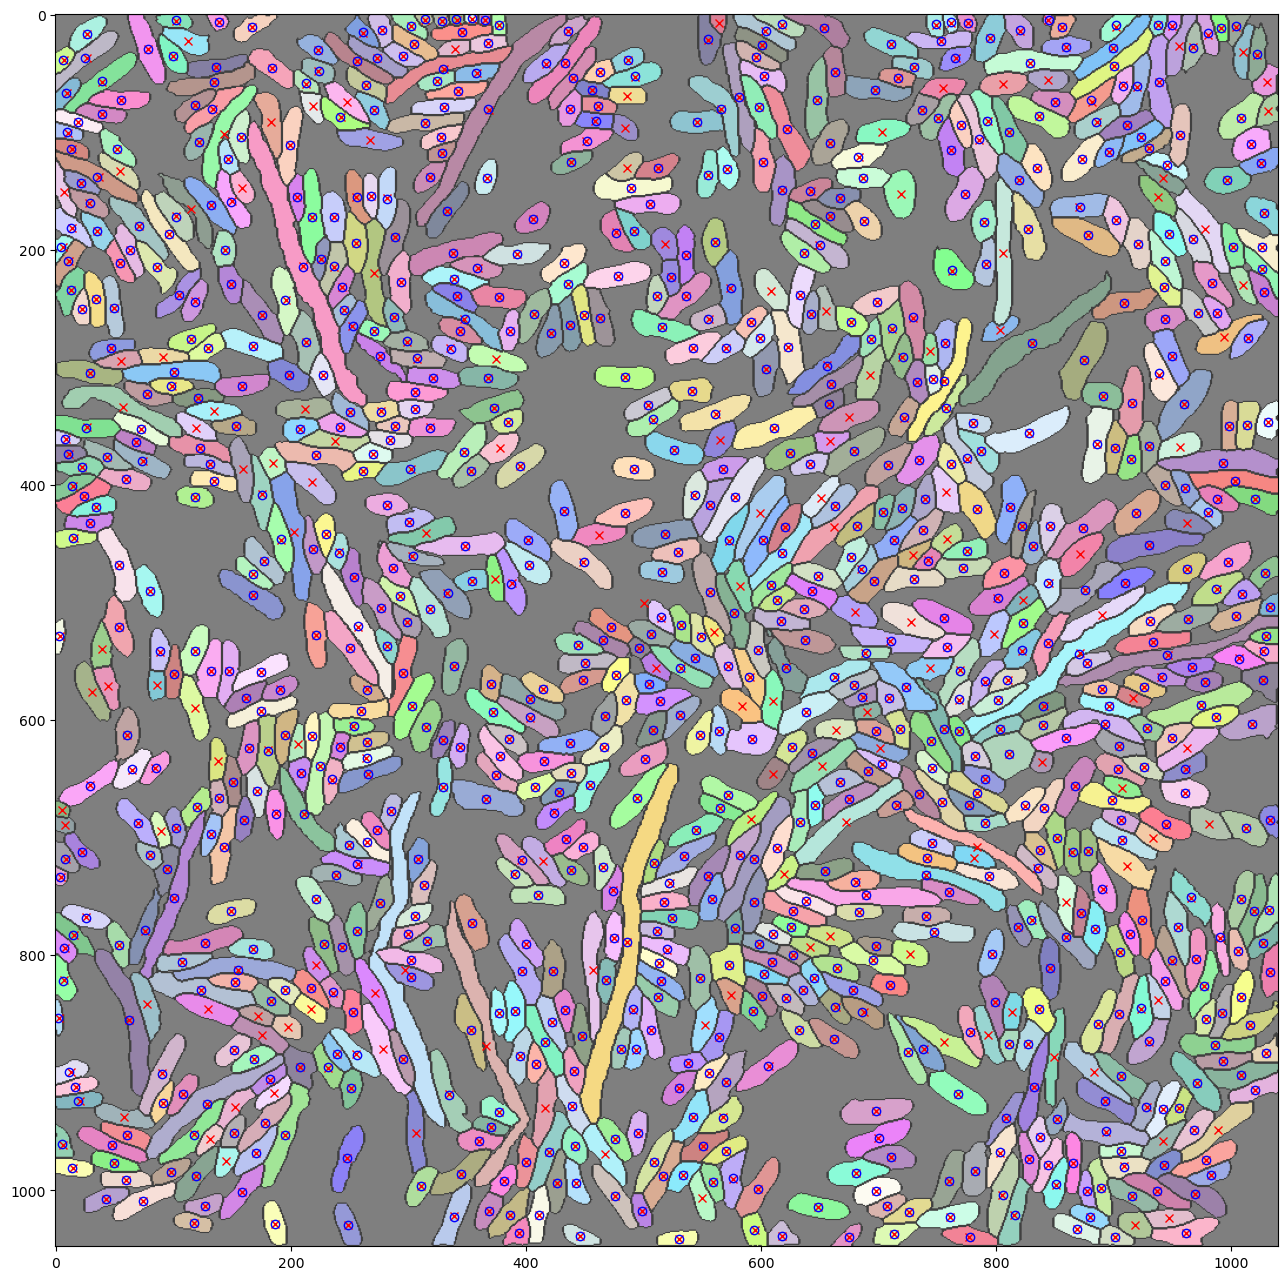

In [ ]:
from detect_clusters import matchDPTrack

i = 0
name = names[i]
inputfile = join(indir,name)
print(inputfile)

L2 = imread(inputfile)
L2rgb = labels2rgb(L2.astype(int))
rag2 = generate_graph(L2)

df1 = df[df.frame==i]

map2toT, next_id = matchDPTrack(rag2, df1, next_id=next_id)
for u in rag2.nodes:
  node = rag2.nodes[u]
  node['trackid'] = map2toT[node['id']]

KT = rag_attribute_image(L2, rag2, 'trackid').astype(int)
KTrgb = labels2rgb(KT)

s = 16
fig,ax = plt.subplots(1,1,figsize=(s,s))
show_rag2(L2, rag2, KTrgb*0.5+0.5, img_cmap=None, ax=ax, border_color='#404040', edge_width=3, edge_cmap='magma', 
            hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
plt.plot(df2.cx,df2.cy,'x',markeredgecolor='r')
plt.plot(df1.cx,df1.cy,'o', mfc='none', markeredgecolor='b')

In [52]:
df1.loc[0] = dict(trackid=0, frame=1, cx=0, cy=0)
df1

/tmp/ipykernel_4674/2876321106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[0] = dict(trackid=0, frame=1, cx=0, cy=0)


trackid  frame          cx          cy
5            2      1  834.097975  277.822889
13           3      1  922.578366  207.464278
28           4      1  292.256975  277.799804
42           5      1  947.290196  212.891912
64           7      1  678.254473  279.629708
...        ...    ...         ...         ...
18204     1523      1   37.743179  294.020759
18206     1524      1  257.186555  346.192920
18208     1525      1  305.490079  337.118651
18210     1526      1  781.085051  621.433419
0            0      1    0.000000    0.000000

[1046 rows x 4 columns]

In [56]:
df1.sort_values('trackid')

trackid  frame          cx          cy
0            0      1    0.000000    0.000000
5            2      1  834.097975  277.822889
13           3      1  922.578366  207.464278
28           4      1  292.256975  277.799804
42           5      1  947.290196  212.891912
...        ...    ...         ...         ...
18202     1522      1  578.598521  281.670286
18204     1523      1   37.743179  294.020759
18206     1524      1  257.186555  346.192920
18208     1525      1  305.490079  337.118651
18210     1526      1  781.085051  621.433419

[1046 rows x 4 columns]

/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20000_cp_masks.png
Cell DPTrack match: matched = 930, unmatched=0, new = 141, map2to1[0] = 0
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20001_cp_masks.png
Cell DPTrack match: matched = 1046, unmatched=0, new = 33, map2to1[0] = 0


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:725: UserWarning: next_cid < n1
  map2to1 = np.zeros( (n2,), dtype=int )


Cluster match: matched = 156, new = 56
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20002_cp_masks.png
Cell DPTrack match: matched = 1054, unmatched=0, new = 40, map2to1[0] = 0


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cluster match: matched = 160, new = 56
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20003_cp_masks.png
Cell DPTrack match: matched = 1053, unmatched=0, new = 28, map2to1[0] = 0


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cluster match: matched = 164, new = 59
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20004_cp_masks.png
Cell DPTrack match: matched = 1023, unmatched=2, new = 44, map2to1[0] = 0


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cluster match: matched = 172, new = 51
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20005_cp_masks.png
Cell DPTrack match: matched = 1027, unmatched=0, new = 32, map2to1[0] = 0


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cluster match: matched = 167, new = 48
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20006_cp_masks.png
Cell DPTrack match: matched = 1017, unmatched=0, new = 32, map2to1[0] = 0


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cluster match: matched = 166, new = 51
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20007_cp_masks.png
Cell DPTrack match: matched = 1024, unmatched=1, new = 47, map2to1[0] = 0


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cluster match: matched = 161, new = 52
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20008_cp_masks.png


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:583: UserWarning: next_id < N1
  N2 = int(c2.max())+1
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cell DPTrack match: matched = 1032, unmatched=0, new = 37, map2to1[0] = 0
Cluster match: matched = 154, new = 62
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20009_cp_masks.png


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:583: UserWarning: next_id < N1
  N2 = int(c2.max())+1
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cell DPTrack match: matched = 1004, unmatched=0, new = 45, map2to1[0] = 0
Cluster match: matched = 156, new = 55
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20010_cp_masks.png
Cell DPTrack match: matched = 980, unmatched=0, new = 32, map2to1[0] = 0


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cluster match: matched = 135, new = 52
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20011_cp_masks.png
Cell DPTrack match: matched = 969, unmatched=0, new = 51, map2to1[0] = 0


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cluster match: matched = 139, new = 70
/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks/7-3-24 dynamic packs-20012_cp_masks.png
Cell DPTrack match: matched = 952, unmatched=0, new = 54, map2to1[0] = 0


/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:828: RuntimeWarning: invalid value encountered in divide
  rag1.nodes[item.id_x]['area_change_front'] = default
/home/rmegret/PROBE/cell_track_analysis/detect_clusters.py:829: RuntimeWarning: invalid value encountered in divide
  for _,item in df[df._merge=='right_only'].iterrows():


Cluster match: matched = 147, new = 42


KeyboardInterrupt: 

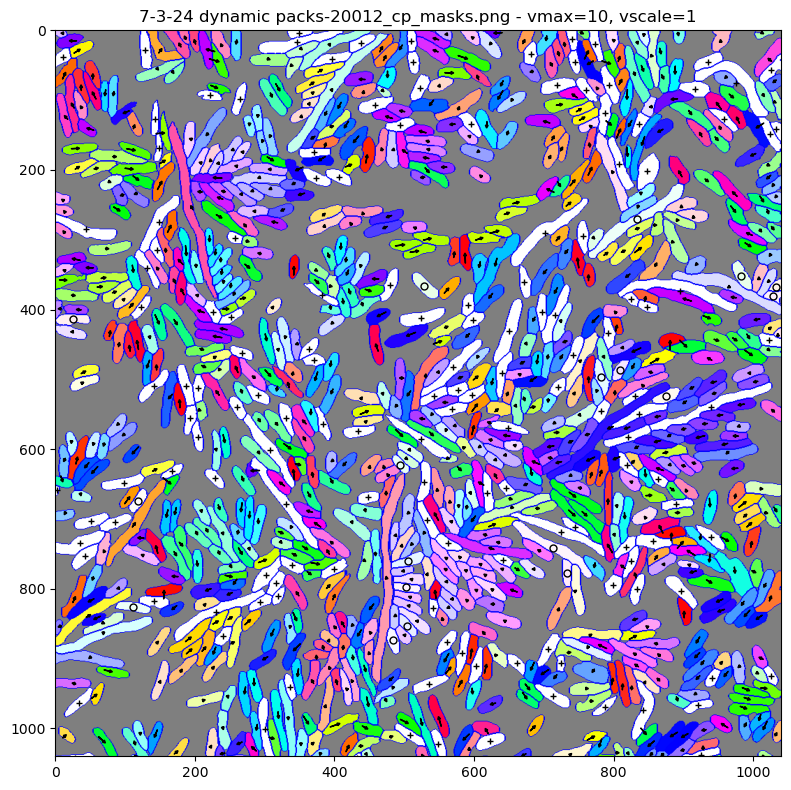

In [71]:
from detect_clusters import EdgeFilterAngleCountVelocity
from detect_clusters import rag_velocity_image, vel2rgb, show_rag2, EdgeFilterNone,xylim
from detect_clusters import generate_graph, trackidFromDPTrack, detectAndTrackClusters
from detect_clusters import computeVelocities, computeAreaChange
from detect_clusters import labels2rgb, rag_attribute_image, rag_velocity_image
from skimage.io import imsave

# New data
ns=list(range(20000,20050))

indir = '/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24 Dynamic Pack Masks'
outdir = '/home/rmegret/PROBE/71024_Dynamic_Pack_Masks/7-10-24_DynPackClusters_DPTracks/'
names = [f'7-3-24 dynamic packs-{n}_cp_masks.png' for n in ns]

#edge_filter = EdgeFilterAngleCount(amax=15, count_min=30) 
edge_filter = EdgeFilterAngleCountVelocity(amax=15, count_min=30, vdiffmax=10)

for subdir in [ 'id_rgb', 'trackid', 'trackid_rgb', 
                'clustertrack', 'clustertrack_rgb', 
                'velocity_back_rgb', 'velocity_back_arrows', 'area_change_back' ]:
  os.makedirs( join(outdir, subdir), exist_ok=True)

L2 = None;  rag2 = None
next_id = None
next_cid = None
#for i in range(4):
for i in range(len(names)):
  L1 = L2;   rag1 = rag2

  name = names[i]
  inputfile = join(indir,name)
  print(inputfile)
  L2 = imread(inputfile)

  # 1. RAG graph
  rag2 = generate_graph(L2)

  # 2. track_id and velocities
  df1 = df[df.frame==i]
  next_id = trackidFromDPTrack(rag2, df1, next_id=next_id)
  computeVelocities(rag1, rag2)
  computeAreaChange(rag1, rag2)

  # 3. clusters
  next_cid = detectAndTrackClusters(rag2, L2, rag1, L1, 
                                edge_filter = edge_filter,
                                cluster_metric='count',
                                cluster_thresh=1, 
                                next_cid=next_cid)

  # VISUALIZATION
  Lrgb = labels2rgb(L2.astype(int))
  KT = rag_attribute_image(L2, rag2, 'trackid').astype(int)
  KTrgb = labels2rgb(KT)
  KC = rag_attribute_image(L2, rag2, 'clustertrack').astype(int)
  KCrgb = labels2rgb(KC)

  vmax = 10

  V2 = rag_velocity_image(L2, rag2, 'velocity_back').astype(float)
  bg2 = rag_attribute_image(L2, rag2, 'id') == 0
  Vrgb2 = vel2rgb(V2, velocity_max = vmax)
  Vrgb2[bg2,:] = 0.5

  A = rag_attribute_image(L2, rag2, 'area_change_back')
  A = np.clip( A+0.5, 0,1 )
  Argb = plt.cm.bwr(A)
  Argb[bg2,:] = 0.5

  imsave(join(outdir,'id_rgb',f'{name}_id_rgb.png'), np.uint8(Lrgb*255.0))
  imsave(join(outdir,'trackid',f'{name}_trackid.png'), KT.astype(np.int16), check_contrast=False)
  imsave(join(outdir,'trackid_rgb',f'{name}_trackid_rgb.png'), np.uint8(KTrgb*255.0))
  imsave(join(outdir,'clustertrack',f'{name}_cluster.png'), KC.astype(np.int16), check_contrast=False)
  imsave(join(outdir,'clustertrack_rgb',f'{name}_clustertrack_rgb.png'), np.uint8(KCrgb*255.0))
  imsave(join(outdir,'velocity_back_rgb',f'{name}_velocity_back_rgb.png'), np.uint8(Vrgb2*255.0))
  imsave(join(outdir,'area_change_back',f'{name}area_change_back.png'), np.uint8(Argb*255.0))

  r = [0,L2.shape[1], L2.shape[1],0]

  s = 8
  vs = 1
  fig,ax = plt.subplots(1,1,figsize=(s,s))
  show_rag2(L2, rag2, Vrgb2, img_cmap=None, ax=ax, border_color='blue', edge_width=3, edge_cmap='magma', 
            hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0,
            velocity_back=True, velocity_scale=vs, arrow_config=dict(width=0.3, color='k'), )
  plt.title(f'{name} - vmax={vmax}, vscale={vs}')
  xylim(r)
  plt.tight_layout()
  plt.savefig( join(outdir,'velocity_back_arrows',f'{name}_velocity_back_arrows.pdf') )
  plt.savefig( join(outdir,'velocity_back_arrows',f'PNG_{name}_velocity_back_arrows.png') )
  plt.close(fig)

  # show_rag2 does not support cmap borders yet
  fig,ax = plt.subplots(1,1,figsize=(s,s))
  show_rag2(L2, rag2, Argb, img_cmap=None, ax=ax, node_feature='trackid', edge_width=3, edge_cmap='bwr', 
            hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0 )
  plt.title(f'{name} - area_change_back, clim=[-1,1] log2 scale')
  xylim(r)
  plt.tight_layout()
  plt.savefig( join(outdir,'area_change_back',f'LABEL_{name}_area_change_back.png') )
  plt.close(fig)

  #s = 5

  # fig,ax = plt.subplots(1,2,figsize=(3*s,s))
  # show_rag2(L2, rag2, KTrgb, img_cmap=None, ax=ax[0], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
  # xylim(r, ax[0])
  # show_rag2(L2, rag2, KCrgb, img_cmap=None, ax=ax[1], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
  # xylim(r, ax[1])

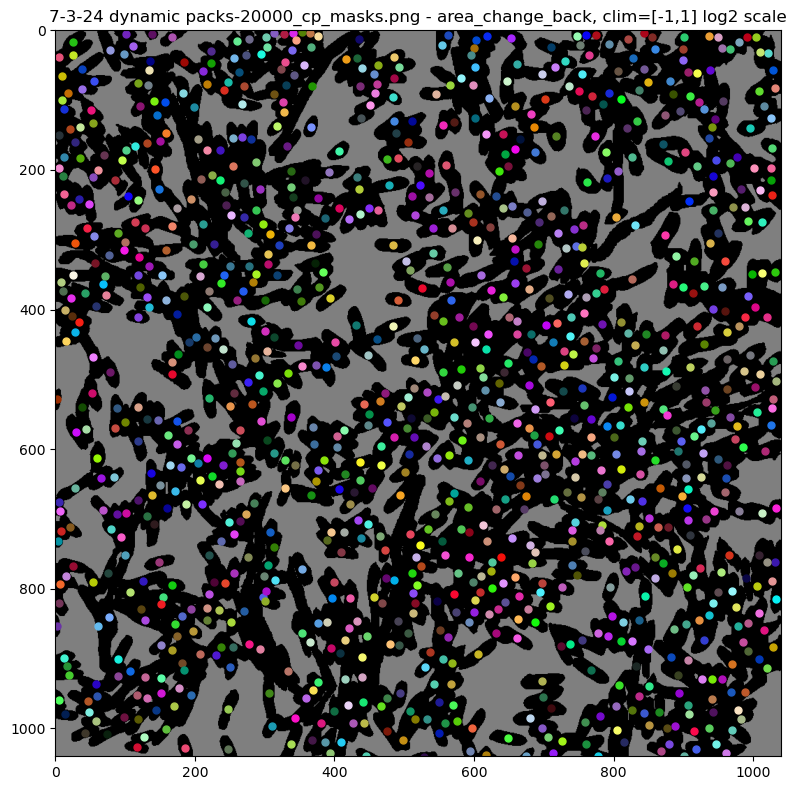

In [70]:
  fig,ax = plt.subplots(1,1,figsize=(s,s))
  show_rag2(L2, rag2, Argb, img_cmap=None, ax=ax, node_feature='trackid', edge_width=3, edge_cmap='bwr', 
            hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0 )
  plt.title(f'{name} - area_change_back, clim=[-1,1] log2 scale')
  xylim(r)
  plt.tight_layout()

In [47]:
K1 = rag_attribute_image(L1, rag1, 'trackid').astype(int)
K2 = rag_attribute_image(L2, rag2, 'trackid').astype(int)
K3 = rag_attribute_image(L3, rag3, 'trackid').astype(int)

Krgb1 = labels2rgb(K1)
Krgb2 = labels2rgb(K2)
Krgb3 = labels2rgb(K3)

fig,ax = plt.subplots(1,3,figsize=(12,4))
show_rag2(L1, rag1, Krgb1, img_cmap=None, ax=ax[0], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[0])
show_rag2(L2, rag2, Krgb2, img_cmap=None, ax=ax[1], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[1])
show_rag2(L3, rag3, Krgb3, img_cmap=None, ax=ax[2], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[2])

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

<Axes: >

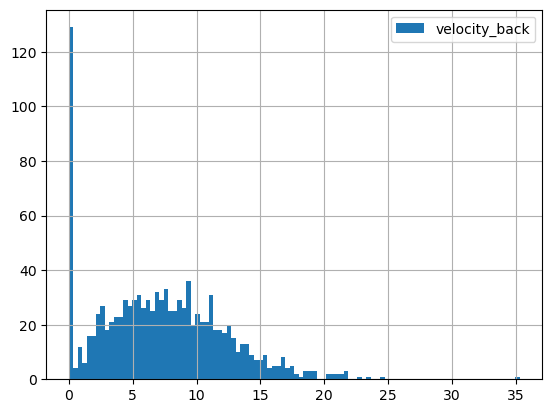

In [ ]:
#computeVelocities(rag1, rag2)
import pandas as pd
data = dict(rag2.nodes.data())
df = pd.DataFrame(data.values(), index=data.keys())
#df['velocity_back'].apply(lambda d: pd.Series(d, index=['vx','vy']))
df['velocity_back'].apply(lambda d: pd.Series(d, index=['vx','vy']))

vs = df['velocity_back'].apply(lambda d: np.linalg.vector_norm(d))
vs.hist(bins=100,legend='velocity')

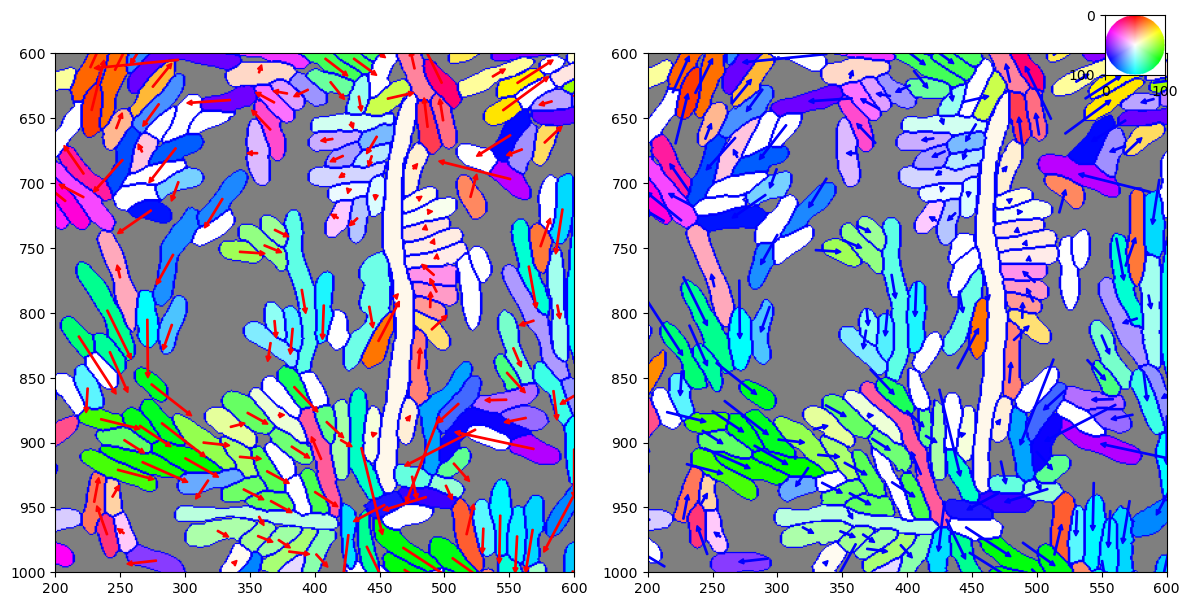

In [151]:
from detect_clusters import rag_velocity_image, vel2rgb, show_rag2, EdgeFilterNone,xylim
V = rag_velocity_image(L1, rag1, 'velocity_front').astype(float)
bg = rag_attribute_image(L1, rag1, 'id') == 0
Vrgb = vel2rgb(V, velocity_max = 10)
Vrgb[bg,:] = 0.5
#plt.imshow(Vrgb)

V2 = rag_velocity_image(L2, rag2, 'velocity_back').astype(float)
bg2 = rag_attribute_image(L2, rag2, 'id') == 0
Vrgb2 = vel2rgb(V2, velocity_max = 10)
Vrgb2[bg2,:] = 0.5

s=6
vs = 3
r = [200,600, 1000,600]

fig,ax = plt.subplots(1,2,figsize=(2*s,s))
show_rag2(L1, rag1, Vrgb, img_cmap=None, ax=ax[0], border_color='blue', velocity_front=True, velocity_scale=vs, edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[0])

show_rag2(L2, rag2, Vrgb2, img_cmap=None, ax=ax[1], border_color='blue', velocity_back=True, velocity_scale=vs, edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[1])

fig.tight_layout()

axhue = fig.add_axes( (0.9,0.9,0.1,0.1) )
xs = np.linspace(-1,1,101)
ys = np.linspace(-1,1,101)
Vlegend = vel2rgb(np.stack(np.meshgrid(ys,xs,indexing='ij'),axis=-1), clip_magnitude=False)
axhue.imshow(Vlegend)

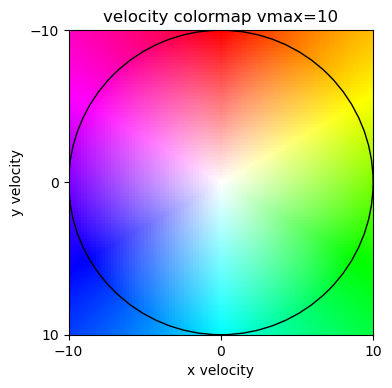

In [ ]:
import matplotlib


fig,ax = plt.subplots(1,1,figsize=(4,4))
vmax=10
xs = np.linspace(-1,1,101)
ys = np.linspace(-1,1,101)
Vlegend = vel2rgb(np.stack(np.meshgrid(ys,xs,indexing='ij'),axis=-1), clip_magnitude=True)
plt.imshow(Vlegend, extent=[-vmax,vmax,vmax,-vmax])
plt.xticks([-vmax,0,vmax])
plt.yticks([-vmax,0,vmax])
plt.xlabel('x velocity')
plt.ylabel('y velocity')
plt.title(f'velocity colormap vmax={vmax}')
ax.add_patch(matplotlib.patches.Circle((0,0),10, edgecolor='k',facecolor='#fff0'))
plt.tight_layout()
plt.savefig(join(outdir,'velocity_legend.png'))

In [159]:
import matplotlib.patches
matplotlib.patches.Circle((0,0),10,)

In [ ]:
K1 = rag_attribute_image(L1, rag1, 'trackid').astype(int)
K2 = rag_attribute_image(L2, rag2, 'trackid').astype(int)
Vrgb = rag_attribute_image(L1, rag1, 'velocity_front', mode='velocity', velocity_max=5.0).astype(float)

Krgb1 = labels2rgb(K1)
Krgb2 = labels2rgb(K2)

fig,ax = plt.subplots(1,3,figsize=(12,4))
show_rag2(L1, rag1, Krgb1, img_cmap=None, ax=ax[0], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[0])
show_rag2(L2, rag2, Krgb2, img_cmap=None, ax=ax[1], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[1])
show_rag2(L1, rag1, Vrgb, img_cmap=None, ax=ax[2], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[2])

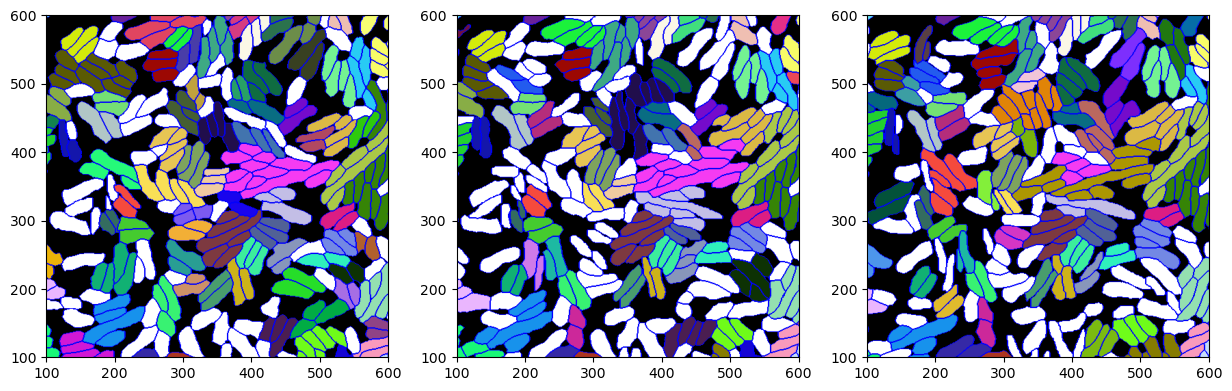

In [258]:
K1 = rag_attribute_image(L1, rag1, 'clustertrack').astype(int)
K2 = rag_attribute_image(L2, rag2, 'clustertrack').astype(int)
K3 = rag_attribute_image(L3, rag3, 'clustertrack').astype(int)

Krgb1 = labels2rgb(K1)
Krgb2 = labels2rgb(K2)
Krgb3 = labels2rgb(K3)

r = [100,600, 100,600]
s = 5

fig,ax = plt.subplots(1,3,figsize=(3*s,s))
show_rag2(L1, rag1, Krgb1, img_cmap=None, ax=ax[0], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[0])
show_rag2(L2, rag2, Krgb2, img_cmap=None, ax=ax[1], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[1])
show_rag2(L3, rag3, Krgb3, img_cmap=None, ax=ax[2], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[2])

In [ ]:
n1 = int(L1.max())+1
map1toT = np.zeros( (n1,), dtype=int )
for u in rag1.nodes:
  node = rag1.nodes[u]
  map1toT[node['id']] = node['trackid']
L1T = map1toT[L1]

show_rag2(L1T, rag3, Krgb3, img_cmap=None, ax=ax[2], border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=EdgeFilterNone(), show_filtered=False, ignore_node=0)
xylim(r, ax[2])

In [267]:
!mkdir -p bacteriamasks4/cc_rgb/ bacteriamasks4/cc_rgbb/ bacteriamasks4/cc/

In [295]:
folder='bacteriamasks0'

In [300]:
!mkdir -p {folder}/cc_rgb/ {folder}/cc_rgbb/ {folder}/cc/ {folder}/Lrgb/

In [302]:
from skimage.io import imsave

for kk in range(len(filenames)):
  f = filenames[kk]
  n = ns[kk]
  print(f, n)

  L = imread(f)

  outname = f'{folder}/cc/cc_wbeads000{n}_cp_clusters.tiff'
  rgbname = f'{folder}/cc_rgb/cc_rgb_wbeads000{n}_cp_rgbclusters.png'
  rgbbname = f'{folder}/cc_rgbb/cc_rgbb_wbeads000{n}_cp_rgbclusters.png'
  LRGBname = f'{folder}/Lrgb/Lrgb_wbeads000{n}_cp.png'

  print(f,outname,rgbname)
  
  rag = skimage.graph.rag_boundary(L, np.ones_like(L,dtype=np.float32))
  augment_graph(rag, L)
  compute_clusters(rag, min_cluster_size=3, edge_filter=edge_filter0)

  LRGB = labels2rgb(L)
  imsave(LRGBname, np.uint8(LRGB*255.0))

  LC = rag_attribute_image(L, rag, 'cluster').astype(np.int16)
  LCRGB = labels2rgb(LC)

  imsave(outname, LC)
  imsave(rgbname, np.uint8(LCRGB*255.0))

  LCRGB_boundaries = segmentation.mark_boundaries(LCRGB, L, color=[0,0,1.0])
  imsave(rgbbname, np.uint8(LCRGB_boundaries*255.0))

  

bacteriamasks/wbeads0000_cp_masks.png 0
bacteriamasks/wbeads0000_cp_masks.png bacteriamasks0/cc/cc_wbeads0000_cp_clusters.tiff bacteriamasks0/cc_rgb/cc_rgb_wbeads0000_cp_rgbclusters.png


/tmp/ipykernel_479/1983881363.py:27: UserWarning: bacteriamasks0/cc/cc_wbeads0000_cp_clusters.tiff is a low contrast image
  imsave(outname, LC)


bacteriamasks/wbeads0001_cp_masks.png 1
bacteriamasks/wbeads0001_cp_masks.png bacteriamasks0/cc/cc_wbeads0001_cp_clusters.tiff bacteriamasks0/cc_rgb/cc_rgb_wbeads0001_cp_rgbclusters.png


/tmp/ipykernel_479/1983881363.py:27: UserWarning: bacteriamasks0/cc/cc_wbeads0001_cp_clusters.tiff is a low contrast image
  imsave(outname, LC)


bacteriamasks/wbeads0002_cp_masks.png 2
bacteriamasks/wbeads0002_cp_masks.png bacteriamasks0/cc/cc_wbeads0002_cp_clusters.tiff bacteriamasks0/cc_rgb/cc_rgb_wbeads0002_cp_rgbclusters.png


/tmp/ipykernel_479/1983881363.py:27: UserWarning: bacteriamasks0/cc/cc_wbeads0002_cp_clusters.tiff is a low contrast image
  imsave(outname, LC)


bacteriamasks/wbeads0003_cp_masks.png 3
bacteriamasks/wbeads0003_cp_masks.png bacteriamasks0/cc/cc_wbeads0003_cp_clusters.tiff bacteriamasks0/cc_rgb/cc_rgb_wbeads0003_cp_rgbclusters.png


/tmp/ipykernel_479/1983881363.py:27: UserWarning: bacteriamasks0/cc/cc_wbeads0003_cp_clusters.tiff is a low contrast image
  imsave(outname, LC)


bacteriamasks/wbeads0005_cp_masks.png 5
bacteriamasks/wbeads0005_cp_masks.png bacteriamasks0/cc/cc_wbeads0005_cp_clusters.tiff bacteriamasks0/cc_rgb/cc_rgb_wbeads0005_cp_rgbclusters.png


/tmp/ipykernel_479/1983881363.py:27: UserWarning: bacteriamasks0/cc/cc_wbeads0005_cp_clusters.tiff is a low contrast image
  imsave(outname, LC)


bacteriamasks/wbeads0006_cp_masks.png 6
bacteriamasks/wbeads0006_cp_masks.png bacteriamasks0/cc/cc_wbeads0006_cp_clusters.tiff bacteriamasks0/cc_rgb/cc_rgb_wbeads0006_cp_rgbclusters.png


/tmp/ipykernel_479/1983881363.py:27: UserWarning: bacteriamasks0/cc/cc_wbeads0006_cp_clusters.tiff is a low contrast image
  imsave(outname, LC)


bacteriamasks/wbeads0007_cp_masks.png 7
bacteriamasks/wbeads0007_cp_masks.png bacteriamasks0/cc/cc_wbeads0007_cp_clusters.tiff bacteriamasks0/cc_rgb/cc_rgb_wbeads0007_cp_rgbclusters.png


/tmp/ipykernel_479/1983881363.py:27: UserWarning: bacteriamasks0/cc/cc_wbeads0007_cp_clusters.tiff is a low contrast image
  imsave(outname, LC)


bacteriamasks/wbeads0008_cp_masks.png 8
bacteriamasks/wbeads0008_cp_masks.png bacteriamasks0/cc/cc_wbeads0008_cp_clusters.tiff bacteriamasks0/cc_rgb/cc_rgb_wbeads0008_cp_rgbclusters.png


/tmp/ipykernel_479/1983881363.py:27: UserWarning: bacteriamasks0/cc/cc_wbeads0008_cp_clusters.tiff is a low contrast image
  imsave(outname, LC)


bacteriamasks/wbeads0009_cp_masks.png 9
bacteriamasks/wbeads0009_cp_masks.png bacteriamasks0/cc/cc_wbeads0009_cp_clusters.tiff bacteriamasks0/cc_rgb/cc_rgb_wbeads0009_cp_rgbclusters.png


/tmp/ipykernel_479/1983881363.py:27: UserWarning: bacteriamasks0/cc/cc_wbeads0009_cp_clusters.tiff is a low contrast image
  imsave(outname, LC)


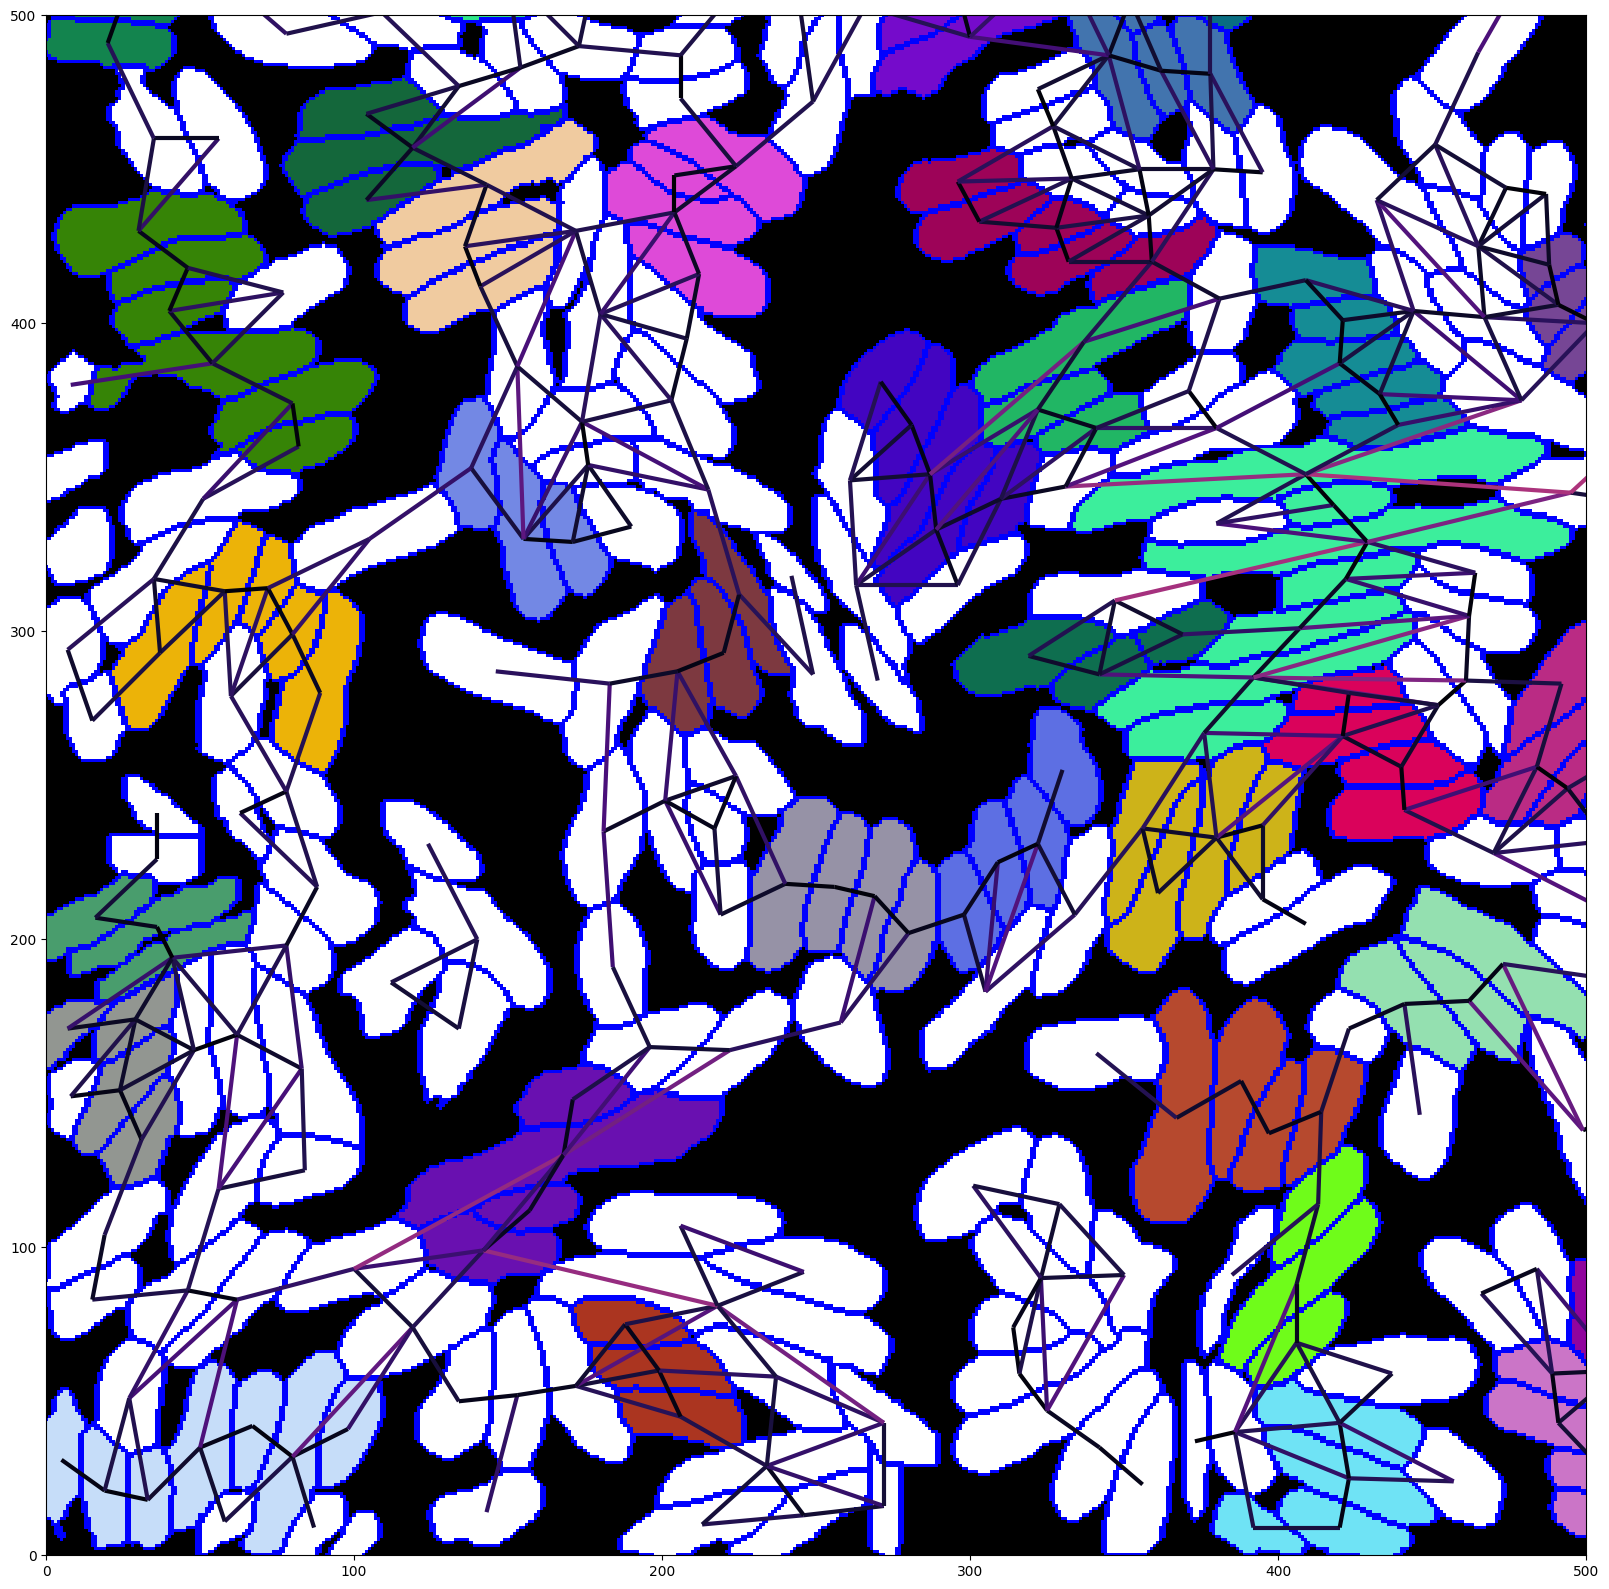

In [279]:
#Lrgb = labels2rgb(L)
Lcluster = labels2rgb(map_attribute(L, rag, 'cluster').astype(int))

fig,ax = plt.subplots(1,1,figsize=(20,20))
show_rag2(L, rag, Lcluster, img_cmap=None, ax=ax, border_color='blue', dataname='centroid_distance', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=None, show_filtered=False, ignore_node=0)
rg = (0,500,0,500)
xylim(rg)
plt.savefig('raw_graph_a15_cd30.png')

In [285]:
L.shape

(1048, 1040)

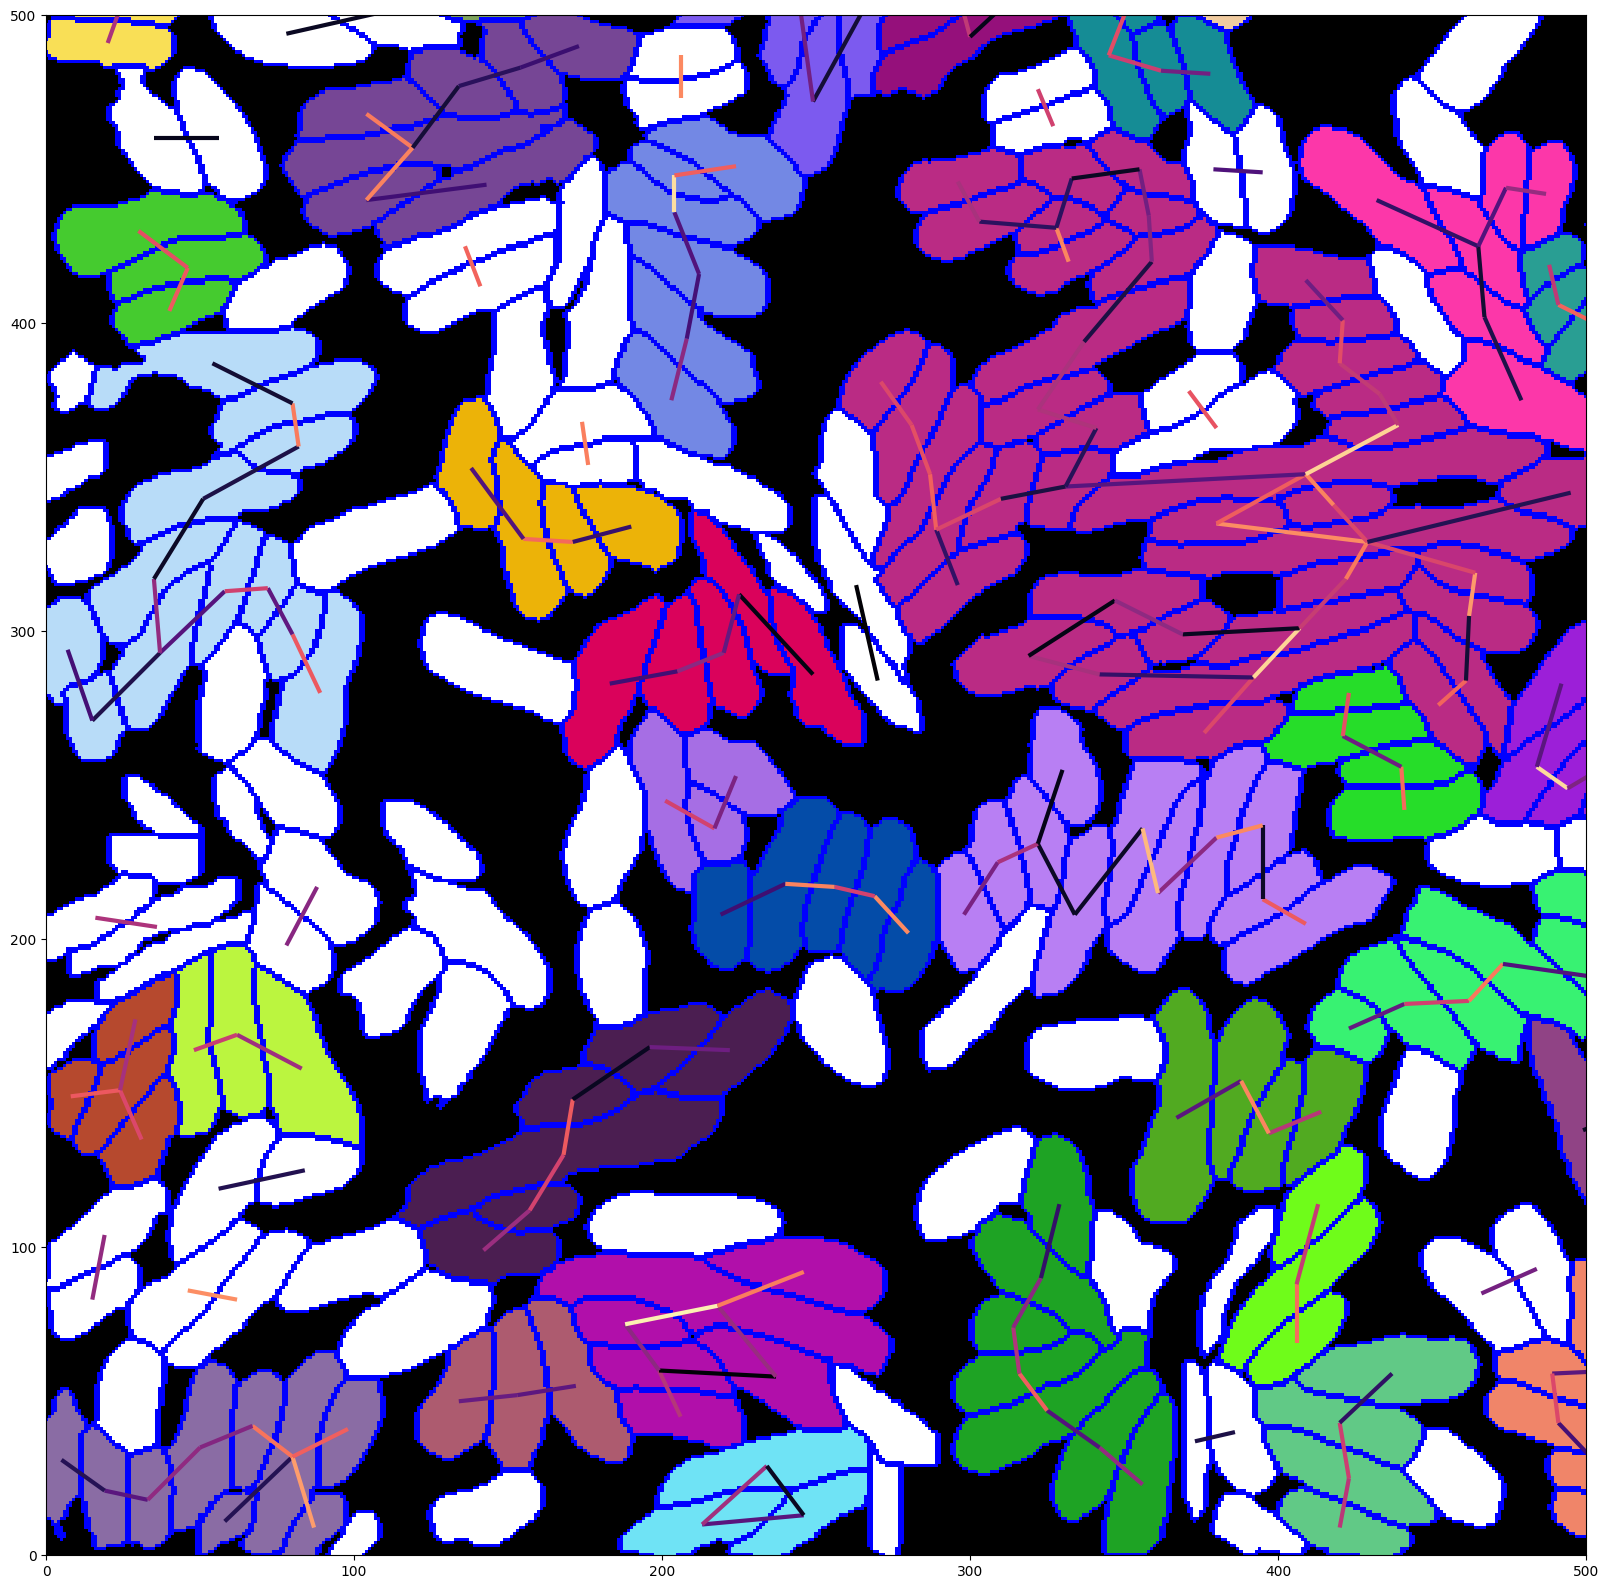

In [293]:
def edge_filter0(rag, u, v, amax=45, mcmin=0.20):
  return ( (rag.get_edge_data(u,v)['relative_angle']<=amax) \
      and (rag.get_edge_data(u,v)['max_count_ratio']>=mcmin) )

rag = skimage.graph.rag_boundary(L, np.ones_like(L,dtype=np.float32))
augment_graph(rag, L)
compute_clusters(rag, min_cluster_size=3, edge_filter=edge_filter0)

LC = map_attribute(L, rag, 'cluster').astype(np.int16)
LCRGB = labels2rgb(LC)

#Lrgb = labels2rgb(L)
Lcluster = labels2rgb(map_attribute(L, rag, 'cluster').astype(int))

fig,ax = plt.subplots(1,1,figsize=(20,20))
show_rag2(L, rag, Lcluster, img_cmap=None, ax=ax, border_color='blue', dataname='max_count_ratio', edge_width=3, edge_cmap='magma', hide_zero=True, edge_filter=edge_filter0, show_filtered=False, ignore_node=0)
rg = (0,500,0,500)
xylim(rg)
plt.savefig('pruned_graph_a45_mc0.20.png')

In [233]:
df = to_pandas_nodelist(rag)
df = df[df.cluster>0].copy()

In [234]:
df

labels   area     angle                                 centroid  \
7        [7]  586.0 -1.258973   [9.448805460750853, 420.3754266211604]   
8        [8]  432.0 -0.143083  [15.034722222222221, 807.0879629629629]   
10      [10]  563.0 -0.013226   [17.05328596802842, 823.7388987566608]   
11      [11]  367.0  0.796472  [10.425068119891009, 887.3569482288829]   
13      [13]  467.0 -1.176955  [11.618843683083512, 988.1070663811563]   
...      ...    ...       ...                                      ...   
1139  [1139]  502.0 -1.505174  [1039.9262948207172, 658.3366533864541]   
341    [341]  690.0  0.573147   [333.4405797101449, 289.7217391304348]   
405    [405]  511.0 -0.602894  [384.79843444227004, 963.7455968688845]   
624    [624]  428.0  1.066319   [570.6355140186915, 772.4415887850467]   
686    [686]  374.0 -0.247647   [639.5080213903743, 43.82085561497326]   

      boundary_count  cluster  
7                245        2  
8                155        3  
10               222        3  
11               191        4  
13               274        5  
...              ...      ...  
1139             236      249  
341              367       71  
405              251       74  
624              224      136  
686              206      151  

[559 rows x 6 columns]

In [236]:
H = compute_clusters(rag, min_cluster_size=3, edge_filter=edge_filter4)

In [241]:
df = nx.to_pandas_edgelist(H)
df

source  target  count  relative_angle  centroid_distance  weight  \
0         4      44    100        3.990150          27.744145     1.0   
1         7      17     41        6.439503          28.118086     1.0   
2         7      38     85        7.008135          16.208022     1.0   
3        38      54    118        8.912963          17.907330     1.0   
4         8      10     30        7.440239          16.772843     1.0   
..      ...     ...    ...             ...                ...     ...   
542    1129    1137     67        6.017271          12.704859     1.0   
543    1114    1122    105        2.538594          17.030590     1.0   
544    1122    1134    116        0.093402          14.549922     1.0   
545    1134    1139     69        7.653990          28.409704     1.0   
546    1133    1144     49       10.975161          12.088962     1.0   

     max_count_ratio  
0           0.330033  
1           0.196172  
2           0.346939  
3           0.359756  
4           0.193548  
..               ...  
542         0.345361  
543         0.368421  
544         0.379085  
545         0.292373  
546         0.195219  

[547 rows x 7 columns]

In [ ]:
LCRGB_boundaries = segmentation.mark_boundaries(LCRGB, L, color=[0,0,255])
plt.imshow(LCRGB_boundaries)
xylim( rg )

# Analysis of cluster properties

Text(0, 0.5, 'centroid distance')

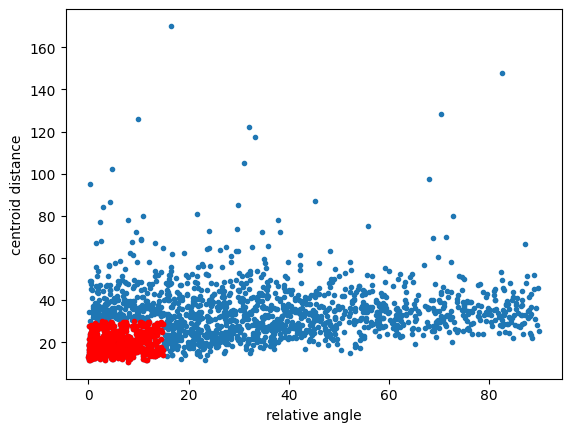

In [258]:
df = nx.to_pandas_edgelist(rag)

H = compute_clusters(rag, min_cluster_size=3, edge_filter=edge_filter4)
df2 = nx.to_pandas_edgelist(H)

df = df[ (df.source!=0)&(df.target!=0) ]
df2 = df2[ (df2.source!=0)&(df2.target!=0) ]

plt.plot( df['relative_angle'], df['centroid_distance'], '.' )
plt.plot( df2['relative_angle'], df2['centroid_distance'], 'r.' )
plt.xlabel('relative angle')
plt.ylabel('centroid distance')

Text(0, 0.5, 'common boundary count')

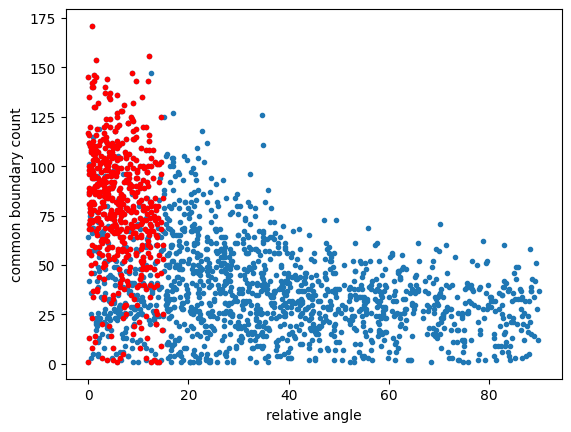

In [259]:
plt.plot( df['relative_angle'], df['count'], '.' )
plt.plot( df2['relative_angle'], df2['count'], 'r.' )
plt.xlabel('relative angle')
plt.ylabel('common boundary count')

# Interactive plots

In [6]:
from dash import Dash, dcc, html, Input, Output, callback

import plotly.express as px

import json
import pandas as pd

In [14]:
P = regionprops(L)

labels = np.array([p.label for p in P])
C = np.array([p.centroid for p in P])
angle = np.array([p.orientation for p in P])
area = np.array([p.area for p in P])

In [16]:
df = pd.DataFrame()
df['x'] = C[:,0]
df['y'] = C[:,1]
df['angle'] = angle
df['area'] = area

fig = px.imshow(L)
fig2 = px.scatter(df, x="x", y="y", color="area", custom_data=["angle"])

fig2.show()

In [41]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

df = pd.DataFrame({
    "x": [1,2,1,2],
    "y": [1,2,3,4],
    "customdata": [1,2,3,4],
    "fruit": ["apple", "apple", "orange", "orange"]
})

fig = px.scatter(df, x="x", y="y", color="fruit", custom_data=["customdata"])

fig.update_layout(clickmode='event+select')

fig.update_traces(marker_size=20)

app.layout = html.Div([
    dcc.Graph(
        id='basic-interactions',
        figure=fig
    ),

    html.Div(className='row', children=[
        html.Div([
            dcc.Markdown("""
                **Hover Data**

                Mouse over values in the graph.
            """),
            html.Pre(id='hover-data', style=styles['pre'])
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Click Data**

                Click on points in the graph.
            """),
            html.Pre(id='click-data', style=styles['pre']),
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Selection Data**

                Choose the lasso or rectangle tool in the graph's menu
                bar and then select points in the graph.

                Note that if `layout.clickmode = 'event+select'`, selection data also
                accumulates (or un-accumulates) selected data if you hold down the shift
                button while clicking.
            """),
            html.Pre(id='selected-data', style=styles['pre']),
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Zoom and Relayout Data**

                Click and drag on the graph to zoom or click on the zoom
                buttons in the graph's menu bar.
                Clicking on legend items will also fire
                this event.
            """),
            html.Pre(id='relayout-data', style=styles['pre']),
        ], className='three columns')
    ])
])


@callback(
    Output('hover-data', 'children'),
    Input('basic-interactions', 'hoverData'))
def display_hover_data(hoverData):
    return json.dumps(hoverData, indent=2)


@callback(
    Output('click-data', 'children'),
    Input('basic-interactions', 'clickData'))
def display_click_data(clickData):
    return json.dumps(clickData, indent=2)


@callback(
    Output('selected-data', 'children'),
    Input('basic-interactions', 'selectedData'))
def display_selected_data(selectedData):
    return json.dumps(selectedData, indent=2)


@callback(
    Output('relayout-data', 'children'),
    Input('basic-interactions', 'relayoutData'))
def display_relayout_data(relayoutData):
    return json.dumps(relayoutData, indent=2)


In [42]:
app.run(debug=True)

In [ ]:
import napari

napari.run()